# Relationship of Sugar & Velocity

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
%load_ext autoreload
%autoreload 2

In [2]:
from utils.libaries import *
from utils.data_loading import findFiles,LoadDataSignals
from utils.global_parameters import *
from Data_Denoising.data_denoising import *
from Data_Denoising.time_synchronization import *
from Data_Denoising.moving_average_filter import *
from Data_Denoising.derivative_filtering import apply_improved_derivative_filter
from Data_Denoising.dc_offset_removal import *
from plotting_module.signal_plot import *
from Data_Denoising.bandpass_filtering import *
from waveform_detection.detect_waveform import *
from waveform_detection.pan_algorithm import *
from time_of_flight_calculation.zero_crossings import *
from time_of_flight_calculation.tof import *
from time_of_flight_calculation.velocity import *
from time_of_flight_calculation.sugar_velocity_relationship import *
from plotting_module.signal_veclocity_plot import *
from time_of_flight_calculation.correlation import *
from time_of_flight_calculation.metrics import *
from statistical_analysis.experiments_analyis import *

#### Extract relevant files for processing


##### Velocity using TOF & Pan Tomkins Algorithm & Waveform Detection using Thresholding

In [3]:
waveforms=["sin","squ"]
expected_periods= ["1","5","9"]

expected_waveform= waveforms[1]
periods= expected_periods[0]

unique_file_list= findFiles(expected_waveform,periods,root_folder,sample_number=1)
unique_file_list

['/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/144000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-144000mg-squ1-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/108000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-108000mg-squ1-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/36000mg/2025may28-ram-WaterSugar_mid_solution-36000mg-squ1-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/18000mg/2025may28-ram-WaterSugar_mid_solution-18000mg-squ1-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental sign


Processing File: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/144000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-144000mg-squ1-pure_water_solution_1.mat
Shape of raw signal: (100, 2, 16000)
Concentration: 144000 mg, Waveform: squ, Period: 1
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6116, 8662)]
Experiment 1 - Receive Echo Start: 48928.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6116, 8662)]
Experiment 2 - Receive Echo Start: 48928.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6116, 8662)]
Experiment 3 - Re

/Users/madhviasthana/Documents/Bio-Medical-Signal-Processing-1/codebase/waveform_detection/pan_algorithm.py:15: RuntimeWarning: invalid value encountered in divide
  return (data - np.min(data)) / (np.max(data) - np.min(data))


Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit []
Recieve []
Experiment 46 - Receive Echo Start: 0.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit []
Recieve []
Experiment 47 - Receive Echo Start: 0.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit []
Recieve []
Experiment 48 - Receive Echo Start: 0.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit []
Recieve []
Experiment 49 - Receive Echo Start: 0.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit []
Recieve []
Experiment 50 - Receive Echo Start: 0.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic E

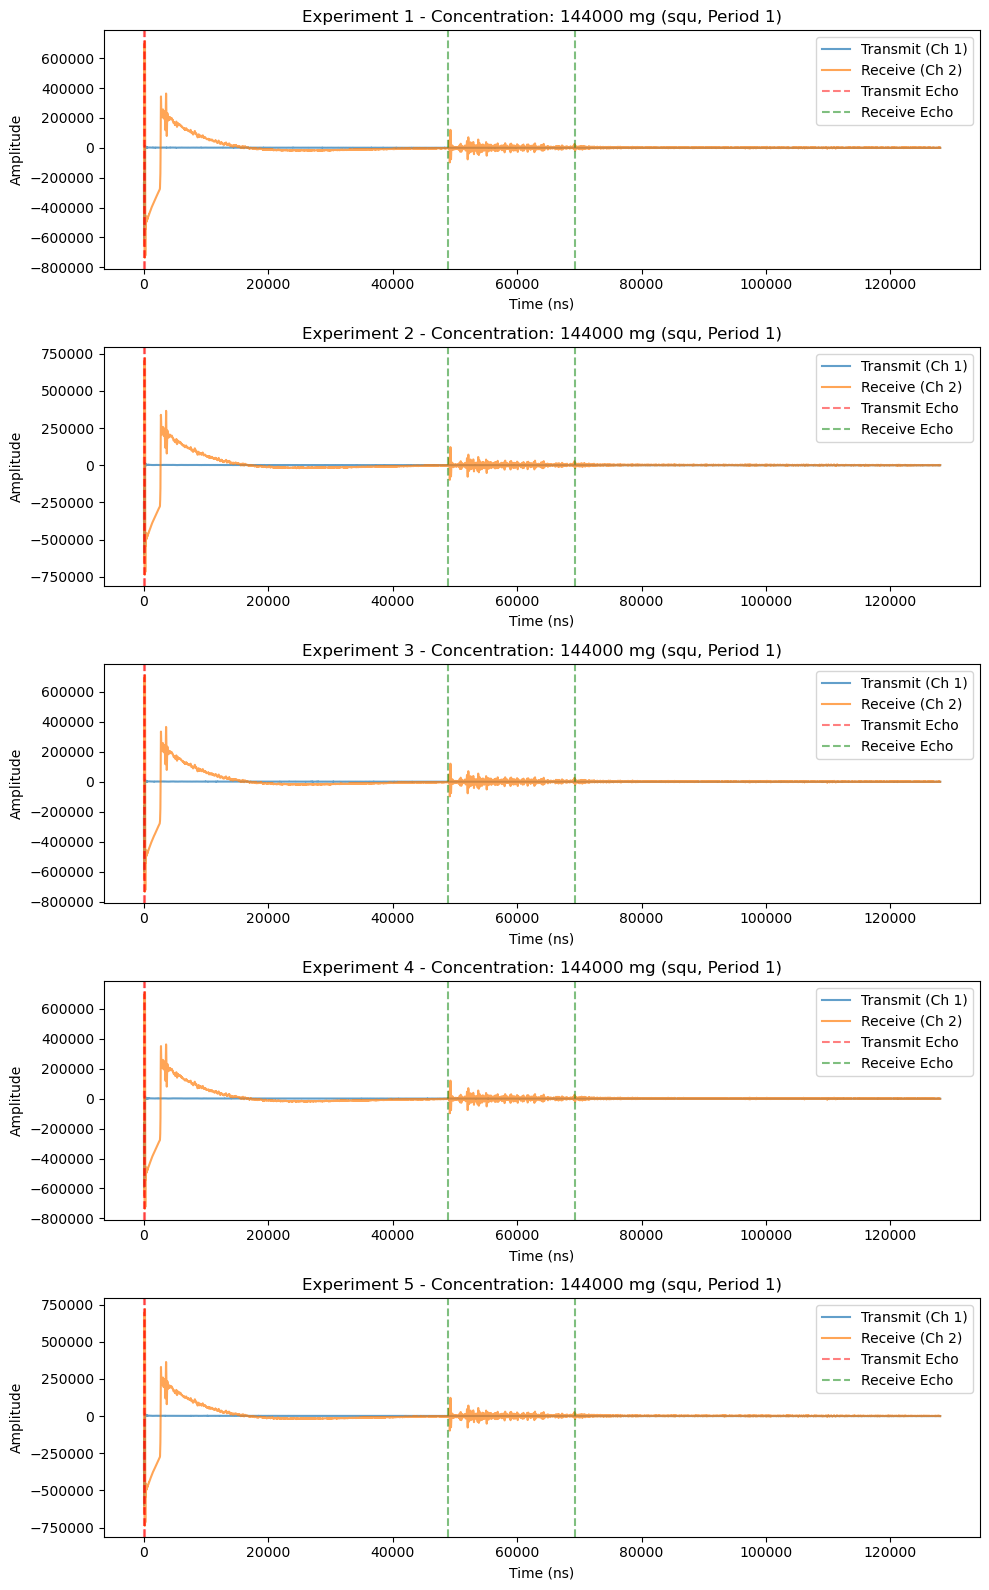


Processing File: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/108000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-108000mg-squ1-pure_water_solution_1.mat
Shape of raw signal: (100, 2, 16000)
Concentration: 108000 mg, Waveform: squ, Period: 1
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6147, 8714)]
Experiment 1 - Receive Echo Start: 49176.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6147, 8714)]
Experiment 2 - Receive Echo Start: 49176.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6147, 8714)]
Experiment 3 - Re

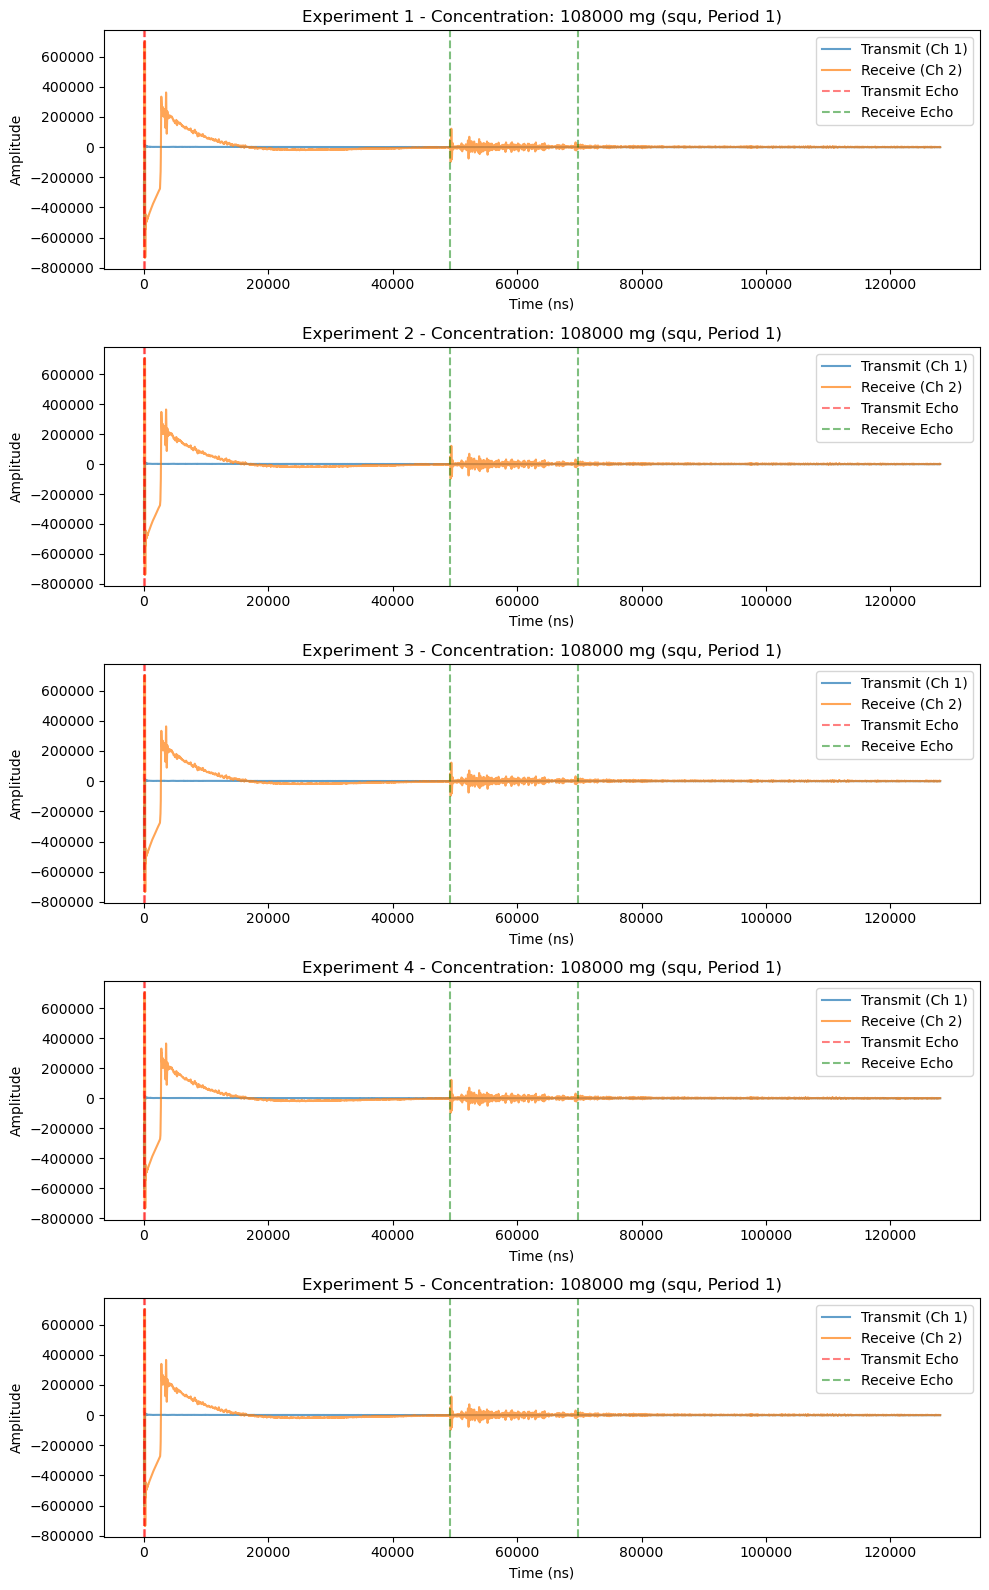


Processing File: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/36000mg/2025may28-ram-WaterSugar_mid_solution-36000mg-squ1-pure_water_solution_1.mat
Shape of raw signal: (100, 2, 16000)
Concentration: 36000 mg, Waveform: squ, Period: 1
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6188, 8859)]
Experiment 1 - Receive Echo Start: 49504.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6189, 8859)]
Experiment 2 - Receive Echo Start: 49512.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6189, 8859)]
Experiment 3 - Receive Echo Start: 49512.0 µs
Dynamic Start T

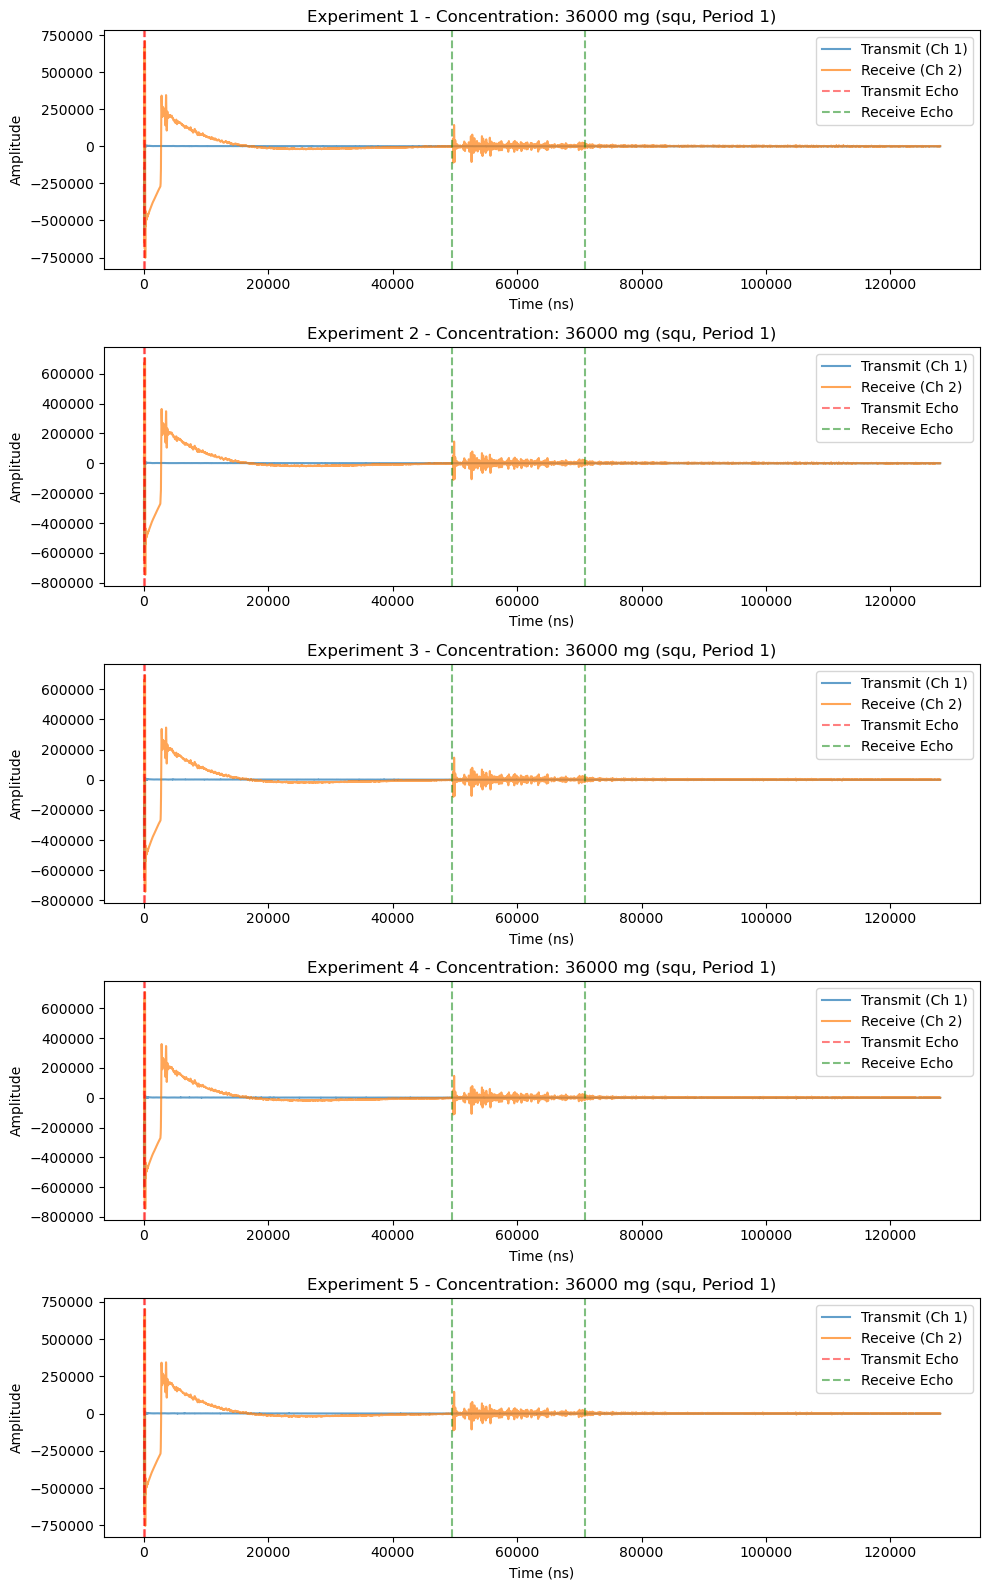


Processing File: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/18000mg/2025may28-ram-WaterSugar_mid_solution-18000mg-squ1-pure_water_solution_1.mat
Shape of raw signal: (100, 2, 16000)
Concentration: 18000 mg, Waveform: squ, Period: 1
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6193, 8850)]
Experiment 1 - Receive Echo Start: 49544.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6194, 8850)]
Experiment 2 - Receive Echo Start: 49552.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6193, 8850)]
Experiment 3 - Receive Echo Start: 49544.0 µs
Dynamic Start T

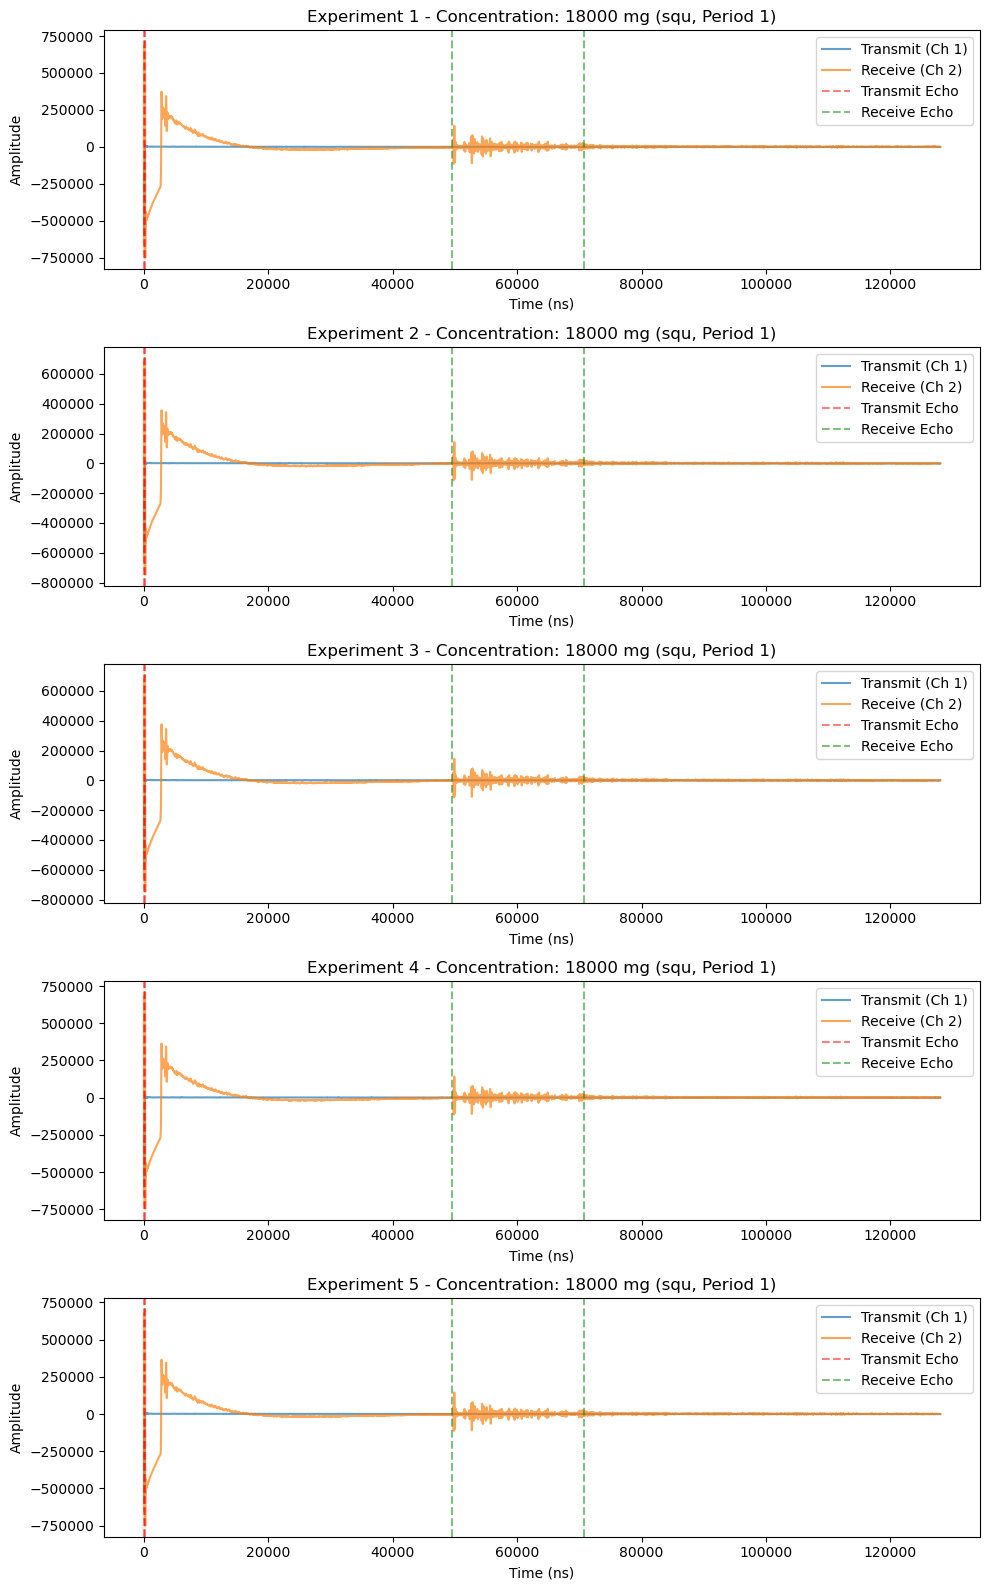


Processing File: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/54000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-54000mg-squ1-pure_water_solution_1.mat
Shape of raw signal: (100, 2, 16000)
Concentration: 54000 mg, Waveform: squ, Period: 1
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6176, 8856)]
Experiment 1 - Receive Echo Start: 49408.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6176, 8856)]
Experiment 2 - Receive Echo Start: 49408.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6176, 8856)]
Experiment 3 - Recei

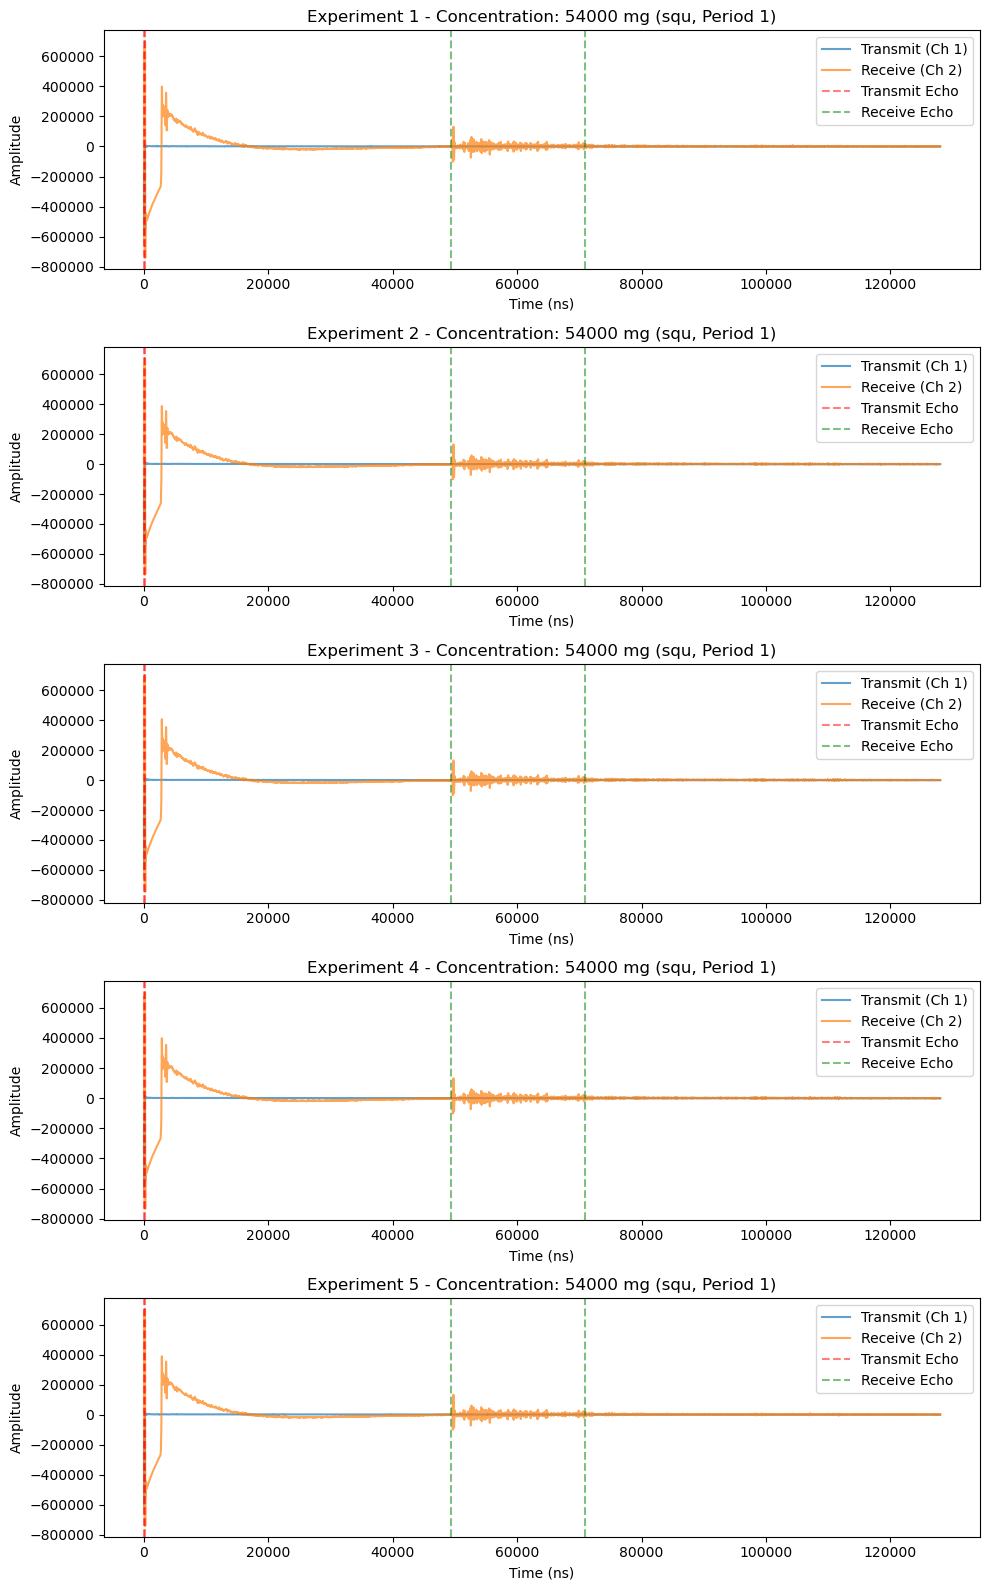


Processing File: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/90000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-90000mg-squ1-pure_water_solution_1.mat
Shape of raw signal: (100, 2, 16000)
Concentration: 90000 mg, Waveform: squ, Period: 1
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6167, 8846)]
Experiment 1 - Receive Echo Start: 49336.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6167, 8846)]
Experiment 2 - Receive Echo Start: 49336.0 µs
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6167, 8846)]
Experiment 3 - Recei

In [4]:
all_signals, all_concentrations, all_echo_data, all_echo_starts, all_echo_ends, all_waveforms, all_periods = process_experiments(unique_file_list)